In [11]:
import pylab
import pymoc
import xidplus
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
from astropy import wcs
from astropy.table import Table
import pandas as pd


## Read tables

In [12]:
cat_prev=Table.read('data/prev/dmu26_XID+MIPS_HDF-N_cat.fits')
len(cat_prev)

13444

In [13]:
cat_new=Table.read('data/20201112/3/dmu26_XID+MIPS_HDF-N_cat.fits')
len(cat_new)

13406

In [14]:
cat_ipac=Table.read('data/ipac/3/dmu26_XID+MIPS_HDF-N_cat_ipacPrior.fits')
len(cat_ipac)

1174

## Look at Symmetry of PDFs to determine depth level of catalogue

2.2306902


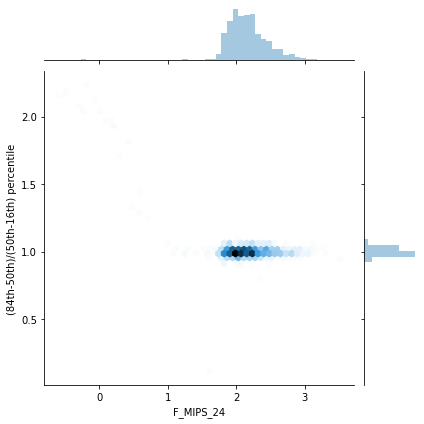

In [6]:
import seaborn as sns
skew=(cat_ipac['FErr_MIPS_24_u']-cat_ipac['F_MIPS_24'])/(cat_ipac['F_MIPS_24']-cat_ipac['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5
g=sns.jointplot(x=np.log10(cat_ipac['F_MIPS_24'][use]),y=skew[use], kind='hex')
# plt.vlines(0.5, 0, 4)
# g.ax_joint.vlines(0.6, 0, 4)

print(np.max(skew[use]))
# g.savefig('../../data/figs/sk_MIPS_HDF-N.pdf', bbox='tight')
# g.savefig('../../data/figs/sk_MIPS_HDF-N.png', bbox='tight')


2.7165594


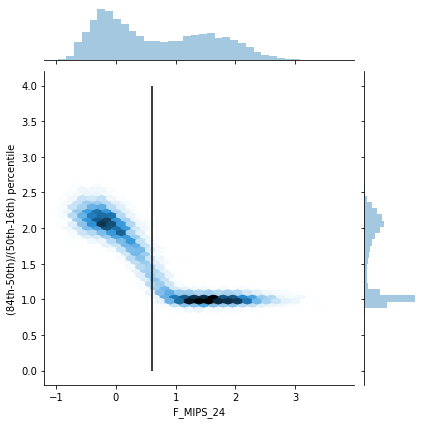

In [26]:
import seaborn as sns
skew=(cat_prev['FErr_MIPS_24_u']-cat_prev['F_MIPS_24'])/(cat_prev['F_MIPS_24']-cat_prev['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5
g=sns.jointplot(x=np.log10(cat_prev['F_MIPS_24'][use]),y=skew[use], kind='hex')
# plt.vlines(0.5, 0, 4)
g.ax_joint.vlines(0.6, 0, 4)

print(np.max(skew[use]))
# g.savefig('../../data/figs/sk_MIPS_HDF-N.pdf', bbox='tight')
# g.savefig('../../data/figs/sk_MIPS_HDF-N.png', bbox='tight')


4.8905325


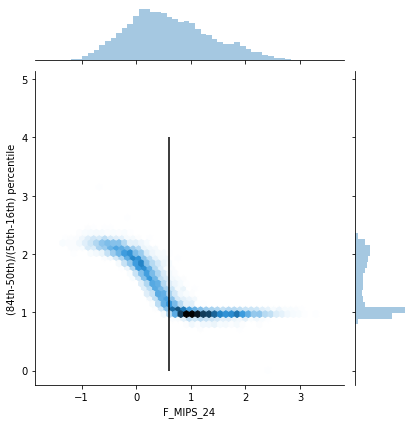

In [27]:
import seaborn as sns
skew=(cat_new['FErr_MIPS_24_u']-cat_new['F_MIPS_24'])/(cat_new['F_MIPS_24']-cat_new['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5
g=sns.jointplot(x=np.log10(cat_new['F_MIPS_24'][use]),y=skew[use], kind='hex')
# plt.vlines(0.5, 0, 4)
g.ax_joint.vlines(0.6, 0, 4)

print(np.max(skew[use]))
# g.savefig('../../data/figs/sk_MIPS_HDF-N.pdf', bbox='tight')
# g.savefig('../../data/figs/sk_MIPS_HDF-N.png', bbox='tight')


Both seem to have flux pdfs that become Gaussian at ~7$\mathrm{\mu Jy}$ 

In [12]:
10**0.6

3.9810717055349722

## Add flag to catalogue

In [2]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_mips_24'))


NameError: name 'cat' is not defined

In [6]:
ind=(cat['Pval_res_24']>0.5) | (cat['F_MIPS_24'] < 4.0)

In [7]:
cat['flag_mips_24'][ind]=True


In [8]:
cat.write('./data/20201112/3/dmu26_XID+MIPS_HDF-N_cat_20201119.fits', format='fits',overwrite=True)

### Check Map


In [4]:
from astropy.io import fits
import pylab as plt

In [5]:
Pval1=fits.open('./data/prev/dmu26_XID+MIPS_HDF-N_Bayes_Pval.fits')
# Pval2=fits.open('./data/changed_psf/3/dmu26_XID+MIPS_HDF-N_Bayes_Pval.fits')
# Pval3=fits.open('./data/20201109/3/dmu26_XID+MIPS_HDF-N_Bayes_Pval.fits')
# Pval4=fits.open('./data/20201111/3/dmu26_XID+MIPS_HDF-N_Bayes_Pval.fits')
Pval5=fits.open('./data/20201112/3/dmu26_XID+MIPS_HDF-N_Bayes_Pval.fits')
Pval6=fits.open('./data/ipac/3/dmu26_XID+MIPS_HDF-N_Bayes_Pval.fits')
# MIPS_pval6=fits.open('./data/20201118/3/dmu26_XID+MIPS_HDF-N_Bayes_Pval.fits') # change 


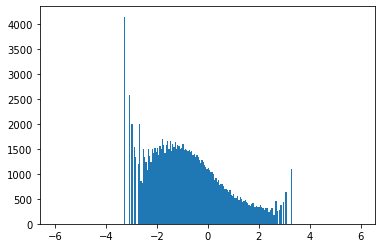

In [29]:
plt.hist(Pval1[1].data[np.isfinite(Pval1[1].data)],bins=np.arange(-6,6,0.05));

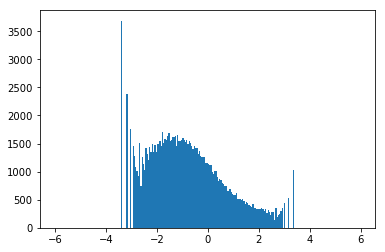

In [18]:
plt.hist(Pval2[1].data[np.isfinite(Pval2[1].data)],bins=np.arange(-6,6,0.05));

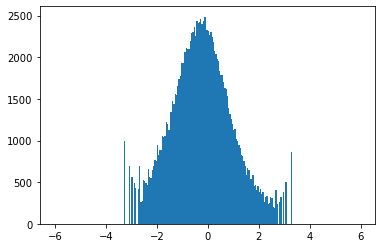

In [5]:
plt.hist(Pval3[1].data[np.isfinite(Pval3[1].data)],bins=np.arange(-6,6,0.05));

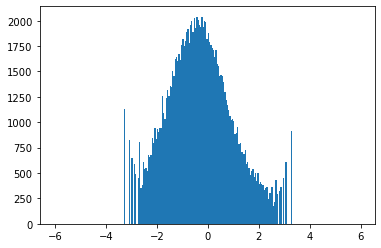

In [6]:
plt.hist(Pval4[1].data[np.isfinite(Pval4[1].data)],bins=np.arange(-6,6,0.05));

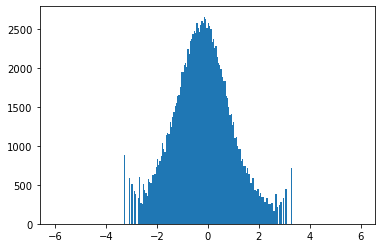

In [20]:
plt.hist(Pval5[1].data[np.isfinite(Pval5[1].data)],bins=np.arange(-6,6,0.05));

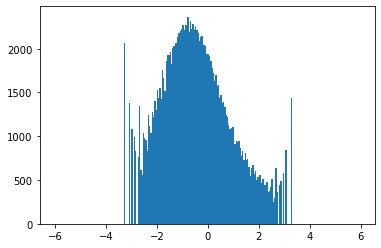

In [8]:
plt.hist(Pval6[1].data[np.isfinite(Pval6[1].data)],bins=np.arange(-6,6,0.05));

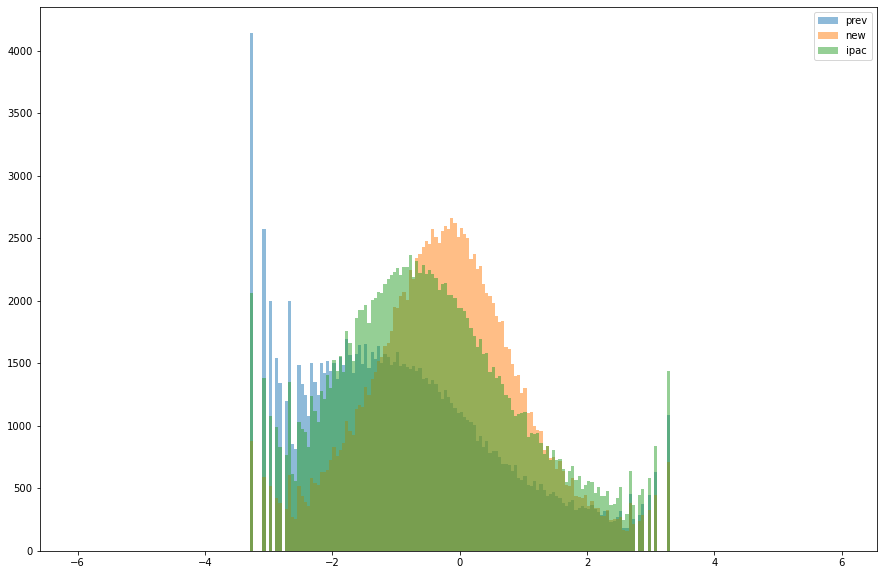

In [9]:
plt.figure(figsize=(15,10))
plt.hist(Pval1[1].data[np.isfinite(Pval1[1].data)],bins=np.arange(-6,6,0.05), alpha=0.5, label='prev');
plt.hist(Pval5[1].data[np.isfinite(Pval5[1].data)],bins=np.arange(-6,6,0.05), alpha=0.5, label='new');
plt.hist(Pval6[1].data[np.isfinite(Pval6[1].data)],bins=np.arange(-6,6,0.05), alpha=0.5, label='ipac');
plt.legend()

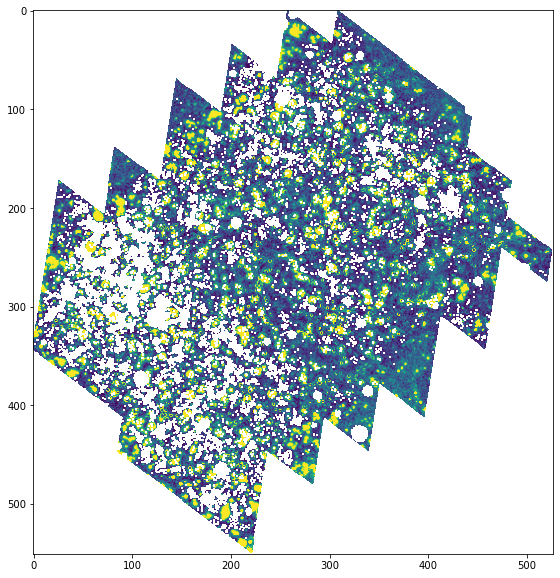

In [35]:
plt.figure(figsize=(15,10))
plt.imshow(Pval1[1].data)

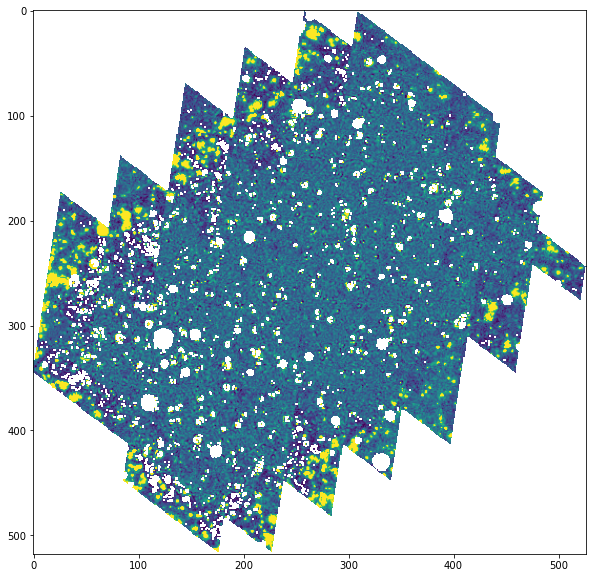

In [36]:
plt.figure(figsize=(15,10))
plt.imshow(Pval5[1].data)

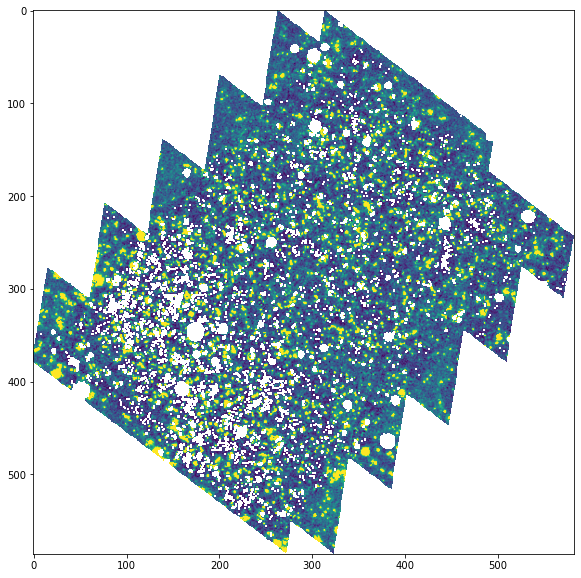

In [10]:
plt.figure(figsize=(15,10))
plt.imshow(Pval6[1].data)

In [6]:
import seaborn as sns
import aplpy

keyword looks very much like CRVALia but isn't. [astropy.wcs.wcs]
keyword looks very much like CRVALia but isn't. [astropy.wcs.wcs]


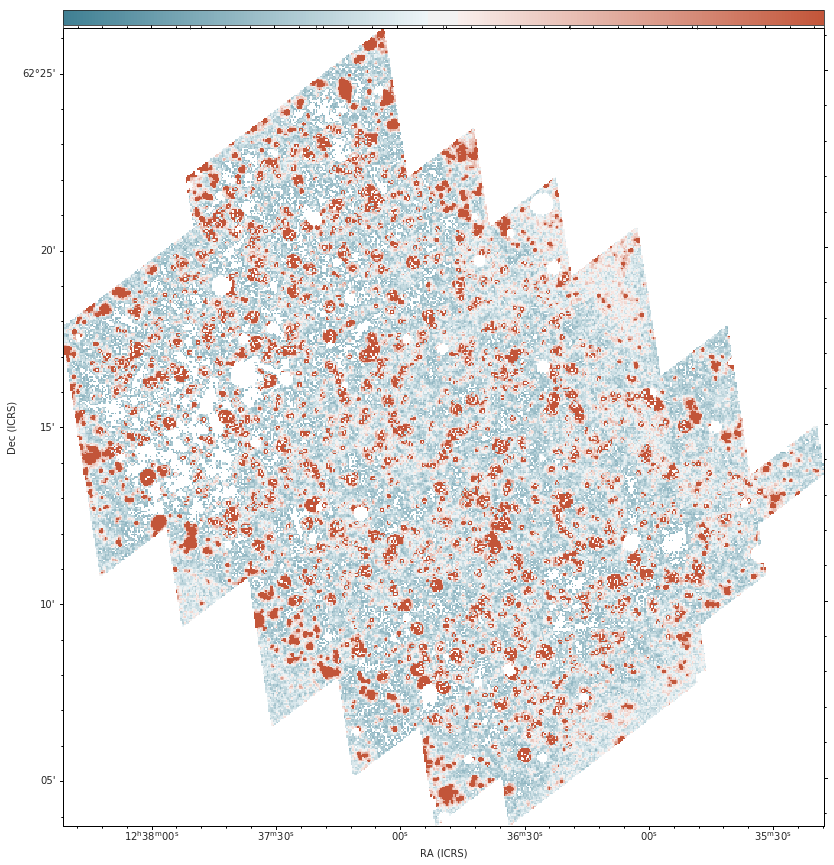

In [24]:
sns.set_style("white")
cmap = sns.diverging_palette(220, 20, as_cmap=True)

fig = plt.figure(figsize=(20, 15))
Bayes_p_map=aplpy.FITSFigure('./data/changed_psf/3/dmu26_XID+MIPS_HDF-N_Bayes_Pval.fits', figure=fig)
Bayes_p_map.show_colorscale(vmin=-6, vmax=6, cmap=cmap)
Bayes_p_map.add_colorbar()
Bayes_p_map.colorbar.set_location('top')

In [7]:
import pylab as plt
%matplotlib inline


import numpy as np
import xidplus
from xidplus import moc_routines

In [8]:
priors,posterior=xidplus.load('../../dmu26/dmu26_XID+MIPS_HDF-N/data/20201112/3/Tile_11522079_11.pkl')


In [8]:
# priors,posterior=xidplus.load('../../dmu26/dmu26_XID+SPIRE_HDF-N/data/newLdust/Tile_720129_9.pkl')


In [9]:
xidplus.replicated_map_movie(priors, posterior, 50)

keyword looks very much like CRVALia but isn't. [astropy.wcs.wcs]
keyword looks very much like CRVALia but isn't. [astropy.wcs.wcs]


keyword looks very much like CRVALia but isn't. [astropy.wcs.wcs]
keyword looks very much like CRVALia but isn't. [astropy.wcs.wcs]


([<aplpy.core.FITSFigure at 0x7f8cc46be520>],
 <Figure size 720x720 with 2 Axes>)

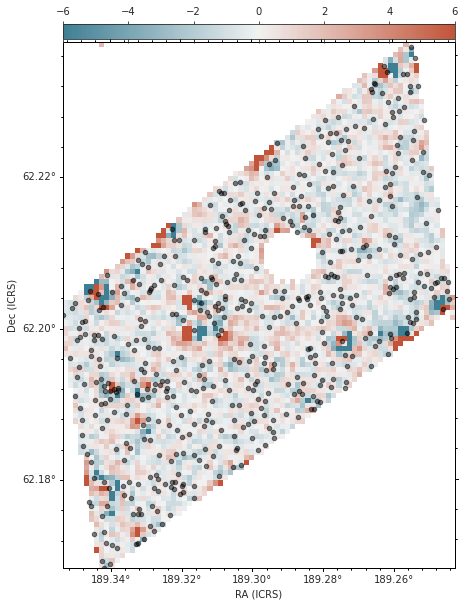

In [10]:
xidplus.plot_Bayes_pval_map(priors,posterior)


In [13]:
# xidplus.replicated_map_movie(priors,posterior,50)
